In [3]:
import pandas as pd
df = pd.read_csv("tip.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:

df = df.drop_duplicates()
# სტრინგ ცვლადების გარდაქმნა რიცხვითში (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)
# ცარიელი მნიშვნელობების წაშლა
df = df.dropna()

print("გაწმენდილ მონაცემებშია:", df.shape[0], "სტრიქონი და", df.shape[1], "სვეტი")
df.head()


გაწმენდილ მონაცემებშია: 243 სტრიქონი და 9 სვეტი


,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# X — პროგნოზირებადი ცვლადები, y — მიზანი
X = df.drop("tip", axis=1)
y = df["tip"]

# train/test განაწილება
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# მოდელები
model1 = Lasso(alpha=0.4, max_iter=1000)
model2 = DecisionTreeRegressor(random_state=10)
model3 = RandomForestRegressor(random_state=10)

models = {"Lasso": model1, "Decision Tree": model2, "Random Forest": model3}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} შედეგები:")
    print("R²:", r2_score(y_test, preds))
    print("MSE:", mean_squared_error(y_test, preds))



Lasso შედეგები:
R²: 0.5179277200822378
MSE: 1.174557083310104

Decision Tree შედეგები:
R²: 0.2658221060234669
MSE: 1.78880612244898

Random Forest შედეგები:
R²: 0.4934470508035881
MSE: 1.234203623265306


In [9]:
mean_tip = df["tip"].mean()
df["tip_binary"] = (df["tip"] >= mean_tip).astype(int)
df.head()


,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,tip_binary
0,16.99,1.01,2,False,False,False,True,False,False,0
1,10.34,1.66,3,True,False,False,True,False,False,0
2,21.01,3.50,3,True,False,False,True,False,False,1
3,23.68,3.31,2,True,False,False,True,False,False,1
4,24.59,3.61,4,False,False,False,True,False,False,1


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# ახალი მონაცემები
X = df.drop(["tip", "tip_binary"], axis=1)
y = df["tip_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf1 = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier(random_state=10)
clf3 = KNeighborsClassifier(n_neighbors=5)

classifiers = {"Logistic Regression": clf1, "Decision Tree": clf2, "KNN": clf3}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(f"\n{name} შედეგები:")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))



Logistic Regression შედეგები:
Accuracy: 0.7755102040816326
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        31
           1       0.73      0.61      0.67        18

    accuracy                           0.78        49
   macro avg       0.76      0.74      0.75        49
weighted avg       0.77      0.78      0.77        49


Decision Tree შედეგები:
Accuracy: 0.6122448979591837
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        31
           1       0.48      0.56      0.51        18

    accuracy                           0.61        49
   macro avg       0.60      0.60      0.60        49
weighted avg       0.63      0.61      0.62        49


KNN შედეგები:
Accuracy: 0.7346938775510204
              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.63      0.67      0.65        18

    accuracy            

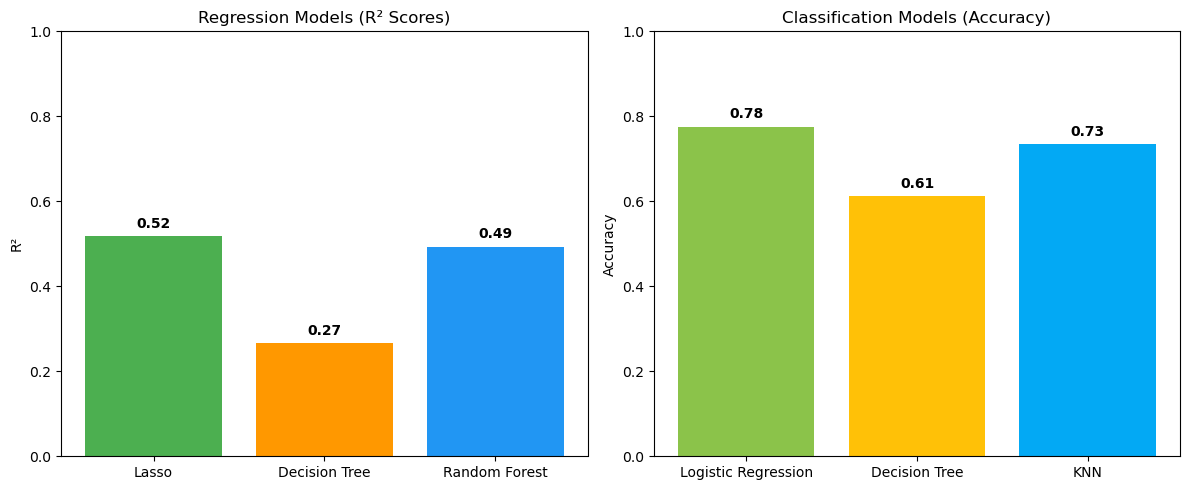

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# რეგრესიის შედეგები (შენი მიღებული ციფრები)
regression_models = ['Lasso', 'Decision Tree', 'Random Forest']
r2_scores = [0.5179, 0.2658, 0.4934]
mse_scores = [1.1745, 1.7888, 1.2342]

# კლასიფიკაციის შედეგები (შენი მიღებული ციფრები)
classification_models = ['Logistic Regression', 'Decision Tree', 'KNN']
accuracy_scores = [0.7755, 0.6122, 0.7347]

# --- რეგრესიის გრაფიკი ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(regression_models, r2_scores, color=['#4CAF50','#FF9800','#2196F3'])
plt.title('Regression Models (R² Scores)')
plt.ylabel('R²')
plt.ylim(0,1)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

# --- კლასიფიკაციის გრაფიკი ---
plt.subplot(1,2,2)
plt.bar(classification_models, accuracy_scores, color=['#8BC34A','#FFC107','#03A9F4'])
plt.title('Classification Models (Accuracy)')
plt.ylabel('Accuracy')
plt.ylim(0,1)
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
